<h1 align = center> CS110 - Project 1 </h1>

---
<h2 align = center> Designing a Scheduler </h2>

---
<h3 align = center> Prof. R. Shekhar </h3>
<h3 align = center> 1/11/2023 </h3>

---

### 1. Setting Up
***1A. Table of Tasks***

![tablecontent](https://i.imgur.com/WHcbQHu.png)
<h3 align = center> Table 1: A table with the tasks for a Sunday </h3>

***1B. Relevance of the tasks***
1. I always start my day with my morning routine which includes things like brushing my teeth, shaving, shower and skin care. I have clubbed them all into one because I do them all together. This is how I start my day everyday and I cannot do not feel to do anything else until and unless I am done with my morning schedule.
2. After my morning routine I typically do a quick and healthy breakfast. Again, I do not like to do other things unless I am done with breakfast.
3. Sunday is also the day for me to do meal prep for the week because I do not get the time to cook on weekdays and to do meal prep I need to go for grocery shopping.
4. I do the meal prep for the day which usually takes me around 2.5 hours.
5. Visiting mueseums for me is a great way to know more about the rotation city and its history and culture. Malba Mueseum is the most popular mueseum in the city and has some exclusive art galleries during a sunday afternoon.
6. I love immmersing myself in the city by going to the local markets. Sunday markets are pretty famous in Buenos Aires and a great place to know what kind of things are currently popular in the city. It is also a great place to buy small gifts.
7. I need to go to Home meal city experience organised by the SLT of BA which is basically SLT's friends inviting a small group of Minervans for dinner. My group wanted to buy a small gift for the family for inviting us for the dinner and I planned to buy that at the Sunday market.
8. Finally, the home meal is a rotation city centered task like the Malba Mueseum and Sunday market because it allows me to hear unique stories of local people from the city.

While some of these tasks are not something that I do daily, like the home meals and exploration of the sunday market. They are still relevant because they showcase the breath of tasks I do in day. There are some tasks that happen at fixed time. For example, my classes or Minerva talks and there are also tasks that are dependent on other tasks.

### 2. Preparing your algorithmic strategy
***2A. Formulate a simple argument for why a priority queue is a particularly well-suited data structure
to prioritize tasks in this context. Why don't we simply sort a list of tasks?***

Using a priority queue is apt for prioritizing tasks in the context of task scheduling due to its operational efficiency and dynamic adaptability. In task scheduling scenarios, it's common for tasks to be added, removed, or reprioritized throughout the day, making it essential to have a structure that can easily handle such dynamics.
A priority queue, implemented using heaps, has the following advantages:

***Efficient Operations:*** Insertions and deletions in a priority queue are done in logarithmic time O(logn). Retrieving the highest priority task is done in constant time O(1).

***Dynamic Handling:*** When a task gets completed, or a new task is added, adjusting the priority queue is computationally cheaper than continuously sorting a list.

We do not simply sort a list of tasks based on priority values because every time a new task is added or deleted from the list, we need to sort the list to retrieve the element with the highest priority.
More specifically, using a list instead of a priority queue has the following disadvantages:

***Insertion Costs:*** Inserting a new task into its correct position in a sorted list takes linear time on average O(n), as we might have to compare all the elements in the list to find the correct position of the new element.

***Deletion Costs:*** Similarly, removing a task other than the one at the start or end can also be costly, with a linear time complexity  O(n).

***Continuous Sorting:*** As previously mentioned. If tasks are frequently added or removed, maintaining a sorted order would require repeated sorting, which has a time complexity of O(nlogn) for most algorithms.

Given that we can have time-flexible and fixed-time tasks in a day, I would separate them into different priority queues because the way we calculate priority for both types of tasks is different. Between fixed tasks, the priority will be based on the start time of the task because fixed tasks that are due relatively earlier in the day must be performed first, as we cannot delay them. Moreover, flexible tasks can be prioritized based on other factors like duration left before due time, duration of the task, etc (explained in the utility section). The separation of tasks into different priority queues ensures that fixed tasks are performed during their fixed times, irrespective of the priority value of a flexible task at that time. It also provides that we do not start a flexible task that will not be finished by the start time of a fixed task.

Separating the tasks allows for a more nuanced handling of priorities, ensuring that fixed-time tasks don't overshadow flexible ones and vice versa. It also provides clarity and reduces the complexity of priority metrics by not mixing inherently different task natures. 
In summary, while priority queues inherently serve task scheduling well, considering the nature of tasks further refines the scheduling process. 

***2B. Describe how your scheduler will work at a very high level. Consider explaining the algorithmic
approach to scheduling to a peer who has not taken CS110 before.***

Imagine that you are trying to plan your day on a Google calendar; our goal with scheduling tasks for a day is to perform tasks based on their relative importance so we do not miss an important task (like attending a class) because of other unimportant tasks like going shopping.

We can do this by separating the tasks into two categories: fixed tasks and flexible tasks. Fixed tasks are the ones that need to be performed at a specific time (like attending a class). We cannot delay these tasks or perform them earlier. So, we schedule these tasks based on their start timing. For example, we do the fixed task of attending the class at 10 a.m., and then we do the fixed task of going to a doctor's appointment at 3 p.m. 

Now, between these fixed tasks, we have time left to perform flexible tasks - tasks that can be performed anytime by a given due time. For example, we can go grocery shopping anytime before 9 p.m. because the grocery shop closes at 10 p.m., and we spend an estimated hour grocery shopping. Similarly, we can have other flexible tasks that can be performed anytime till due time. Now, prioritizing these tasks is more complex because we need to find the relative importance of these tasks for them to be scheduled on the calendar. Should we go grocery shopping first, or should we visit a museum first? 

To achieve this task, we can calculate a priority value for each flexible task based on things like how long it takes to complete a task, how much time is left before the due time of the task, if the task is dependent on other tasks. For example, we can only meal prep if we have done grocery shopping.

To systematically prioritize these tasks on the calendar, we can follow the strategy below:

1. We get the list of all tasks that are not dependent on other tasks.
2. We find the priority value of all those tasks based on their duration and time left between the current time and their due time and then store those values in a list called a priority queue. Priority queue has the property that the value of the last element has the highest or lowest value based on the type of priority queue we use. Since we prioritize the tasks that have less time left between the due time of the task and the current time and tasks that have a shorter duration, we want to use the priority queue that gives us the smaller value as the tasks with smaller priority values are more urgent and hence need to be scheduled first.   
3. If the time left until the due time is the same between two or more tasks, we prioritize the task that takes less time because we want to complete more tasks in the same amount of time. Otherwise, we prioritize the task whose due time is sooner as it is more urgent to complete. We take the last element of this priority queue and schedule it in our calendar.
4. After we schedule this one task, we update the dependencies of all the unscheduled tasks, and then we repeat this procedure by updating the priority value of each task.
5. We repeat this process until no task is left to be scheduled. 

There is one more nuance to this strategy if we come across a flexible task that is in conflict with the starting time of our fixed task. For example, if we start grocery shopping at 9:30 a.m. and it takes an hour to complete this task, we will not be able to do the fixed task of attending the class at 10 a.m. as we will be done with shopping at 10:30 a.m. In this case, we will schedule the task after the fixed task is completed.

<img src = https://i.imgur.com/WMNJdOv.jpg\ width = "500" height = "500" > 
<div style='text-align: center;'>
  Figure 1: Diagram for the Activity Scheduler Algorithm
</div

***2C.
Now, let’s dive into the more technical part of the algorithmic approach. A priority queue
demands a key with which to organize the different tasks. Explain how you have defined and
computed the priority value of each task. This value is a profit/preference level, which you should
compute dynamically (possibly as a function of all the other tasks included in the schedule and
the properties of the task in question).***

The priority value of each task is based on the urgency of the task relative to other tasks at a given moment. Since there are two types of tasks in my scheduler implementation, and they both are different, the way I have computed the priority value for both of them is different.
For the fixed tasks, the priority value is simply the due time or the start time of that fixed task. Since the fixed tasks can only be executed at a certain time, their urgency depends on their start time. Fixed tasks that have an early start time in the day are required to be executed earlier than fixed tasks that are fixed to be done at a later time. So,

**Priority value of fixed tasks = due time/ start time of the fixed task.***

Since an earlier due time means more urgent fixed tasks, we will use the MinHeap priority queue as we want to find tasks that are most urgent first.

For tasks that are flexible, we can compute their priority value based on the time left before their due time and the duration of the task itself. This is because a task that is due soon is more urgent than a task that can be performed later because we cannot execute a task past its due time. This is based on prospect theory; people generally show loss aversion. A task that is due soon is more likely to be not scheduled as compared to a task that is due later, and since humans value losses more than equivalent gains, we want to complete a task that is due soon. In the case that two or more tasks are due at the same time, we prefer to complete the task with a shorter duration because that ensures that we perform the most number of tasks in a given time frame. Again, since urgency increases as the due time comes closer, we prefer to complete tasks with shorter duration.

***Priority value of a flexible task = duration of the task + (due_time of the task - current_time)***

Again, we use a Min priority queue to retrieve the task that is most urgent because the shorter priority value is associated with more urgent tasks. The priority value of the tasks is computed dynamically based on the current time after each task is scheduled. This ensures that we are always scheduling the most urgent tasks first, no matter when a task is added to the list.


### 3. Python implementation.

***3A. Implementation of the Max Heap***

In [51]:
import random
random.seed(10)
#Code modified from CS110 S13 - Heaps and Priority queue

class MinHeapq:
    """ 
    A class that implements properties and methods 
    that support a min priority queue data structure.

    Attributes
    ----------
    heap : list
        A Python list where key values in the min heap are
        stored.
    heap_size: int
        An integer counter of the number of keys present in 
        the min heap.
    """  

    def __init__(self):    
        """
        Initializes an empty min heap.
        """
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Returns the index of the left child node given the
        index of the parent node.

        Parameters
        ----------
        i: int
            Index of parent node.

        Returns
        -------
        int
            Index of the left child node.
        """
        return 2 * i + 1

    def right(self, i):
        """
        Returns the index of the right child node given
        the index of the parent node.

        Parameters
        ----------
        i: int
            Index of parent node.

        Returns
        -------
        int
            Index of the right child node.
        """
        return 2 * i + 2
		
    def parent(self, i):
        """
        Returns the index of the parent node given
        the index of a child node.

        Parameters
        ----------
        i: int
            Index of child node.

        Returns
        -------
        int
            Index of the parent node.
        """
        return (i - 1)//2

    def mink(self):     
        """
        Returns the smallest key in the priority queue.

        Returns
        -------
        int
            The smallest key in the priority queue.
        """
        return self.heap[0]         
  
    def heappush(self, key):  
        """
        Inserts a key into the priority queue.

        Parameters
        ----------
        key: int
            The key value to be inserted.

        Returns
        -------
        None
        """
        self.heap.append(float("inf"))
        self.decrease_key(self.heap_size, key)
        self.heap_size += 1
        
    def decrease_key(self, i, key): 
        """
        Modifies the value of a key in a min priority queue
        to a smaller value.

        Parameters
        ----------
        i: int
            The index of the key to be modified.
        key: int
            The new key value.

        Returns
        -------
        None
        """
        if key > self.heap[i]:
            raise ValueError('new key is larger than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] > self.heap[i]:
            j = self.parent(i)
            self.heap[j], self.heap[i] = self.heap[i], self.heap[j]
            i = j    
       
    def heapify(self, i):
        """
        Restores the min-heap property for a subtree rooted
        at a given index.

        Parameters
        ----------
        i: int
            The index of the root node of the subtree to be
            transformed into a heap.

        Returns
        -------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l] < heap[i]:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r] < heap[smallest]:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)

    def heappop(self):
        """
        Extracts and returns the smallest key from the priority queue.

        Returns
        -------
        int
            The smallest key in the heap.

        Raises
        ------
        ValueError:
            If the heap is empty.
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size -= 1
        self.heapify(0)
        return mink

In [52]:
#Test case 1: Input with mix of positive and negative numbers

A = [22,-31,65,-83,22,-5,0]
my_heap = MinHeapq()

# Inserting elements from A into the heap
for key in A:
    my_heap.heappush(key)

try:
    assert(my_heap.heap == [-83, -31, -5, 22, 22, 65, 0])
    print("✅ Test Case 1 Pass") 
except:
    print(" Test Case 1 Failed")


✅ Test Case 1 Pass


In [53]:
#Test case 2: Input with all positive numbers

A = [6,8,3,7,1,5,2]
my_heap = MinHeapq()

# Inserting elements from A into the heap
for key in A:
    my_heap.heappush(key)

try:
    assert(my_heap.heap == [1, 3, 2, 8, 7, 6, 5])
    print("✅ Test Case 2 Pass") 
except:
    print(" Test Case 2 Failed")


✅ Test Case 2 Pass


In [54]:
#Test case 3: Input with all negative numbers

A = [-6,-8,-3,-7,-1,-5,-2]
my_heap = MinHeapq()

# Inserting elements from A into the heap
for key in A:
    my_heap.heappush(key)

try:
    assert(my_heap.heap == [-8, -7, -5, -6, -1, -3, -2])
    print("✅ Test Case 3 Pass") 
except:
    print(" Test Case 3 Failed")


✅ Test Case 3 Pass


In [55]:
#Test case 4: Empty Input

A = []
my_heap = MinHeapq()

# Inserting elements from A into the heap
for key in A:
    my_heap.heappush(key)

try:
    assert(my_heap.heap == [])
    print("✅ Test Case 4 Pass") 
except:
    print(" Test Case 4 Failed")

✅ Test Case 4 Pass


***3B. Activity Scheduler Implementation***

In [56]:
class Task:
    """ 
    Represents a task with attributes such as description,
    duration, dependencies, and more.
    
    Attributes
    ----------
    id : int
        Unique identifier for the task.
    description : str
        A brief description of the task.
    duration : int
        Duration of the task in minutes.
    dependencies : list
        List of task ids that this task depends on.
    due_time : int
        Due time for the task in minutes since start.
    fixed : bool
        True if task has a fixed start time, False otherwise.
    status : str
        Status of the task, default is "N" (Not started).
    priority_value : int
        Calculated priority value for the task. Lower
        value means higher priority.
    """

    def __init__(self, id, description, duration,
                 dependencies, due_time, fixed, status="N"):
        """
        Initialize a new Task.

        Parameters
        ----------
        id : int
            The unique identifier for the task.
        description : str
            Description of the task.
        duration : int
            How long the task will take, in minutes.
        dependencies : list
            List of task IDs this task depends on.
        due_time : int
            When the task is due, represented as minutes since start.
        fixed : bool
            Whether the task has a fixed starting time.
        status : str, optional
            The current status of the task. Defaults to 'N' (Not started).
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.due_time = due_time
        self.fixed = fixed 
        self.status = status
        self.priority_value = 0

    def priority_value_calculator(self, current_time):
        """
        Calculates the priority value of the task 
        based on its attributes
        and current time.

        Parameters
        ----------
        current_time : int
            The current time in minutes.

        Returns
        -------
        int
            The calculated priority value. Lower 
            value means higher priority.
        """
        if self.fixed:
            return self.due_time
        else:
            return self.duration + (self.due_time - current_time)

    def set_priority(self, current_time):
        """
        Sets the priority value of the task using the
        priority_value_calculator method.

        Parameters
        ----------
        current_time : int
            The current time in minutes.
        """
        self.priority_value = self.priority_value_calculator(current_time)

    def __lt__(self, other):
        """
        Defines the "less than" comparison between this
        task and another based on priority value.

        Parameters
        ----------
        other : Task
            The other Task to compare with.

        Returns
        -------
        bool
            True if this task's priority value is less 
            than the other's, False otherwise.
        """
        return self.priority_value < other.priority_value


class TaskScheduler:
    """
    Represents a scheduler that prioritizes and
    manages tasks based on their attributes.
    
    Attributes
    ----------
    tasks : list
        List of Task objects to be scheduled.
    fixed_priority_queue : MinHeapq
        Priority queue for tasks with a fixed start time.
    unfixed_priority_queue : MinHeapq
        Priority queue for tasks without a fixed start time.
    """
    
    not_yet_started = 'N'
    in_progress = 'I'
    completed = 'C'
    
    def __init__(self, tasks):
        """
        Initializes the task scheduler with a given list of tasks.

        Parameters
        ----------
        tasks : list
            List of Task objects to be scheduled.
        """
        self.tasks = tasks
        self.fixed_priority_queue = MinHeapq()
        self.unfixed_priority_queue = MinHeapq()

    def print_self(self):
        
        #revents the printing of tasks added to the scheduler when 
        #there are no tasks to schedule for the day
        if not self.tasks:
            return
        
        """Displays the tasks added to the scheduler."""
        print("Tasks added to the scheduler:")
        print("--------------------------------------")
        for t in self.tasks:
            print(f"➡️ '{t.description}', duration = {t.duration} mins.")
            if len(t.dependencies) > 0:
                print(f"\t ⚠️ This task depends on tasks with ids: \
                {', '.join(map(str, t.dependencies))}")

    def remove_dependency(self, id):
        """
        Removes a completed task's ID from the dependency lists of other tasks.

        Parameters
        ----------
        id : int
            ID of the completed task.
        """
        for t in self.tasks:
            #update dependencies after completing tasks 
            if t.id != id and id in t.dependencies:
                t.dependencies.remove(id)

    def get_tasks_ready(self, current_time):
        """
        Updates the priority queues with tasks ready to be executed based on their
        dependencies and status.

        Parameters
        ----------
        current_time : int
            The current time in minutes.
        """
        for task in self.tasks:
            # If the task has no dependencies and is not yet in the queue
            if task.status == self.not_yet_started and not task.dependencies:
                task.set_priority(current_time)
                # Update status of the task based on the type of task
                if task.fixed:
                    task.status = self.in_progress
                    self.fixed_priority_queue.heappush(task.priority_value)
                else:
                    task.status = self.in_progress
                    self.unfixed_priority_queue.heappush(task.priority_value)

    def get_task_by_priority(self, priority, fixed):
        """
        Fetches a task based on its priority value and fixed status.

        Parameters
        ----------
        priority : int
            Priority value of the task.
        fixed : bool
            Whether the task has a fixed starting time.

        Returns
        -------
        Task or None
            The task matching the given criteria, or None if not found.
        """
        for task in self.tasks:
            if task.priority_value == priority and task.fixed == \
            fixed and task.status == self.in_progress:
                return task
        return None

    def check_unscheduled_tasks(self):
        """
        Checks if there are any tasks that have not been scheduled.

        Returns
        -------
        bool
            True if unscheduled tasks exist, otherwise False.
        """
        for task in self.tasks:
            if task.status == self.not_yet_started:
                return True 
        return False 

    def format_time(self, time):
        """
        Converts time from minutes to a formatted string representation.

        Parameters
        ----------
        time : int
            Time in minutes.

        Returns
        -------
        str
            Formatted string representation of the time.
        """
        return f"{time//60}h{time%60:02d}"

    def run_task_scheduler(self, starting_time):
        """
        Runs the task scheduler, scheduling tasks based on 
        their priorities and printing updates.

        Parameters
        ----------
        starting_time : int
            Time in minutes when the scheduler starts.
        """
        # Check if there are no tasks and inform the user
        if not self.tasks:
            
            return "There are no tasks to schedule."
        
        current_time = starting_time

        # While there are tasks to be scheduled or tasks in the priority queues
        while self.check_unscheduled_tasks() or \
        len(self.fixed_priority_queue.heap) \
        > 0 or len(self.unfixed_priority_queue.heap) > 0:
            self.get_tasks_ready(current_time)

            # Process fixed tasks first
            if len(self.fixed_priority_queue.heap) > 0:
                # Fetch task by priority
                top_fixed_priority = self.fixed_priority_queue.mink()
                top_fixed = self.get_task_by_priority(top_fixed_priority,
                                                      True)

                # Check if the fixed task is overdue
                if top_fixed and top_fixed.due_time <= current_time:
                    self.fixed_priority_queue.heappop()
                else:
                    if len(self.unfixed_priority_queue.heap) > 0:
                        top_unfixed_priority = self.unfixed_priority_queue.mink()
                        top_unfixed = self.get_task_by_priority(top_unfixed_priority,
                                                                False)

                        # Check which task to process next: fixed or unfixed
                        if top_fixed.due_time - current_time > top_unfixed.duration:
                            self.unfixed_priority_queue.heappop()
                            task = top_unfixed
                        else:
                            current_time = top_fixed.due_time
                            self.fixed_priority_queue.heappop()
                            task = top_fixed
                    else:
                        current_time = top_fixed.due_time
                        self.fixed_priority_queue.heappop()
                        task = top_fixed
            elif len(self.unfixed_priority_queue.heap) > 0:
                # If there are no fixed tasks to process, check for
                #unfixed tasks
                priority = self.unfixed_priority_queue.heappop()
                task = self.get_task_by_priority(priority, False)
            else:
                # If there are no tasks in both priority queues, break
                #out of the loop
                break

            # Display the task execution details
            print(f"🕰 t={self.format_time(current_time)}")
            print(f"\tstarted '{task.description}' for {task.duration} mins...")
            
            # Increment the current time by the task's duration as it completes
            current_time += task.duration
            print(f"\t✅ t={self.format_time(current_time)}, task completed!") 
            
            # Once the task is completed, remove it from the dependency 
            #lists of other tasks
            self.remove_dependency(task.id)
            
            # Mark the task status as completed
            task.status = self.completed

        # Once all tasks are completed, display the total time taken
        total_time = current_time - starting_time             
        print(f"\n🏁 Completed all planned tasks in \
              {total_time//60}h{total_time%60:02d}min!")


***3C. Example with my sample tasks for the day***

In [57]:
# Test running the scheduler based on my schedule
tasks_list = [
    Task(id=1, description="Morning routine", duration=60,
         dependencies=[], due_time=460, fixed=False),
    Task(id=2, description="Eat breakfast", duration=30, 
         dependencies=[1], due_time=720, fixed=False),
    Task(id=3, description="Grocery Shopping", duration=90,
         dependencies=[1,2], due_time=1200, fixed=False),
    Task(id=4, description="Meal Prep for the week", duration=150, 
         dependencies=[1,2,3], due_time=1320, fixed=False),
    Task(id=5, description="Visit the Malba Mueseum", duration=120,
         dependencies=[1,2], due_time=960, fixed=True),
    Task(id=6, description="Explore the Sunday Market", duration=60,
         dependencies=[1,2], due_time=1080, fixed=False),
    Task(id=7, description="Buy a gift for Home Meal", duration=30,
         dependencies=[1,2,6], due_time=1110, fixed=False),
    Task(id=8, description="Leave for the Home Meal", duration=180,
         dependencies=[1,2,6,7], due_time=1140, fixed=True),
]

# Create the TaskScheduler
scheduler = TaskScheduler(tasks_list)
scheduler.print_self()

# Run the scheduler starting from time 0
scheduler.run_task_scheduler(starting_time=7*60)

Tasks added to the scheduler:
--------------------------------------
➡️ 'Morning routine', duration = 60 mins.
➡️ 'Eat breakfast', duration = 30 mins.
	 ⚠️ This task depends on tasks with ids:                 1
➡️ 'Grocery Shopping', duration = 90 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2
➡️ 'Meal Prep for the week', duration = 150 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2, 3
➡️ 'Visit the Malba Mueseum', duration = 120 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2
➡️ 'Explore the Sunday Market', duration = 60 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2
➡️ 'Buy a gift for Home Meal', duration = 30 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2, 6
➡️ 'Leave for the Home Meal', duration = 180 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2, 6, 7
🕰 t=7h00
	started 'Morning routine' for 60 mins...
	✅ t=8h00, task completed!
🕰 t=8h00
	started 'Eat 

In [58]:
# TEST CASE 1: There are no tasks
tasks_list = []

# Create the TaskScheduler
scheduler = TaskScheduler(tasks_list)
scheduler.print_self()

# Run the scheduler starting from time 0
order = scheduler.run_task_scheduler(starting_time=7*60)

try:
    assert scheduler.run_task_scheduler(starting_time=7*60) \
           == "There are no tasks to schedule."
    print("✅ Test Case Passed")
except AssertionError:
    print("❌ Test Case Failed")


✅ Test Case Passed


In [59]:
# TEST CASE 2: Tasks with fixed times are scheduled properly
fixed_task = Task(1, "Fixed Task", 30, [], 480, True)
scheduler = TaskScheduler([fixed_task])
scheduler.run_task_scheduler(420)  # start at 7 AM
try:
    assert fixed_task.status == TaskScheduler.completed
    print("✅ Test Case Passed") 
except:
    print(" Test Case Failed")

🕰 t=8h00
	started 'Fixed Task' for 30 mins...
	✅ t=8h30, task completed!

🏁 Completed all planned tasks in               1h30min!
✅ Test Case Passed


In [60]:
#TEST CASE 3: Changing order of the tasks
# My list of tasks for the day
tasks_list = [
    Task(id=1, description="Morning routine", duration=60, 
         dependencies=[], due_time=460, fixed=False),
    Task(id=2, description="Eat breakfast", duration=30,
         dependencies=[1], due_time=720, fixed=False),
    Task(id=3, description="Grocery Shopping", duration=90,
         dependencies=[1,2], due_time=1200, fixed=False),
    Task(id=4, description="Meal Prep for the week", duration=150,
         dependencies=[1,2,3], due_time=1320, fixed=False),
    Task(id=5, description="Visit the Malba Mueseum", duration=120, 
         dependencies=[1,2], due_time=960, fixed=True),
    Task(id=6, description="Explore the Sunday Market", duration=60,
         dependencies=[1,2], due_time=1080, fixed=False),
    Task(id=7, description="Buy a gift for Home Meal", duration=30,
         dependencies=[1,2,6], due_time=1110, fixed=False),
    Task(id=8, description="Leave for the Home Meal", duration=180,
         dependencies=[1,2,6,7], due_time=1140, fixed=True),
]

# Create the TaskScheduler
scheduler = TaskScheduler(tasks_list)
scheduler.print_self()


original_order = scheduler.run_task_scheduler(starting_time=7*60)
import random

# My list of tasks for the day
tasks_list = [
    Task(id=1, description="Morning routine", duration=60, 
         dependencies=[], due_time=460, fixed=False),
    Task(id=2, description="Eat breakfast", duration=30, 
         dependencies=[1], due_time=720, fixed=False),
    Task(id=3, description="Grocery Shopping", duration=90, 
         dependencies=[1,2], due_time=1200, fixed=False),
    Task(id=4, description="Meal Prep for the week", duration=150,
         dependencies=[1,2,3], due_time=1320, fixed=False),
    Task(id=5, description="Visit the Malba Mueseum", duration=120,
         dependencies=[1,2], due_time=960, fixed=True),
    Task(id=6, description="Explore the Sunday Market", duration=60,
         dependencies=[1,2], due_time=1080, fixed=False),
    Task(id=7, description="Buy a gift for Home Meal", duration=30,
         dependencies=[1,2,6], due_time=1110, fixed=False),
    Task(id=8, description="Leave for the Home Meal", duration=180,
         dependencies=[1,2,6,7], due_time=1140, fixed=True),
]


scheduler = TaskScheduler(tasks_list)
scheduler.print_self()

random.shuffle(tasks_list) #randomises the order of the tasks

scheduler_shuffled = TaskScheduler(tasks_list)
shuffled_order = scheduler_shuffled.run_task_scheduler(starting_time=7*60)

Tasks added to the scheduler:
--------------------------------------
➡️ 'Morning routine', duration = 60 mins.
➡️ 'Eat breakfast', duration = 30 mins.
	 ⚠️ This task depends on tasks with ids:                 1
➡️ 'Grocery Shopping', duration = 90 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2
➡️ 'Meal Prep for the week', duration = 150 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2, 3
➡️ 'Visit the Malba Mueseum', duration = 120 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2
➡️ 'Explore the Sunday Market', duration = 60 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2
➡️ 'Buy a gift for Home Meal', duration = 30 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2, 6
➡️ 'Leave for the Home Meal', duration = 180 mins.
	 ⚠️ This task depends on tasks with ids:                 1, 2, 6, 7
🕰 t=7h00
	started 'Morning routine' for 60 mins...
	✅ t=8h00, task completed!
🕰 t=8h00
	started 'Eat 

In [61]:
#assertion to check if changing the order of tasks in 
#the input produces the same output
try:
    assert original_order == shuffled_order, "The scheduled orders are different!"
    print("✅ Test Case Passed") 
except:
    print(" Test Case Failed")

✅ Test Case Passed


***3D.***
I re-examined my code and made sure that the docstrings are consistent and the inline comments are nontrivial.

### Let’s analyze your algorithm

### Let's analyze your algorithm
***4A. Benefits of the algorithmic strategy:***
1. ***Fixed tasks are always executed on time:*** We use two priority queues to separate the fixed tasks and flexible tasks and have a conditional to ensure that a flexible task is only executed if it does not coincide with the timing of the fixed task. This ensures that our fixed tasks are always executed, no matter the number of flexible tasks in our lists of tasks.

2. ***Tasks that are the dependencies for other tasks are executed first:*** In our strategy, we assume that the dependencies are "hard dependencies," i.e., we cannot execute a task if its dependencies are not completed. Since our algorithm only enqueues tasks to the priority queue that have no dependencies, we can never have a case where a task with dependencies is executed while the dependencies are not complete. For example, we cannot meal prep without grocery shopping.

3. ***Tasks are executed based on their due time and duration:*** Different tasks have different due times, and our scheduler makes sure that the tasks are executed before their due time based on the priority value calculations after every task is executed/scheduled. The urgency of the tasks increases as they come closer to their due time. This is because we want to take into consideration the due times of other tasks before we make the decision to execute a task at a given time. For example, it makes more sense to execute a task that is due at 10 a.m. before a task that is due at 11 p.m. because we can execute the 11 p.m. task even after 10 a.m., but the reverse is not true. Moreover, the tasks with smaller durations are executed first if two or more tasks have the same due time because it ensures that we execute the highest number of tasks in a given time.

***4B. Failure modes and limitations***

1. ***The scheduler does not have an end time:*** The scheduler has a start time, which is basically the time the day starts for a person. The tasks are only executed after the start time of the day. The same is not true for the end time of the scheduler. Given a sufficient number of tasks, the algorithm will output a schedule that is not possible for a human to follow because, in theory, it can schedule tasks one after another for a long period of time. Building on this, we have our second limitation.

2. ***The scheduler does not output tasks that might be unfinished:*** As humans, we love overestimating the work we can do in a day. There are only 24 hrs in a day, and given we sleep for 8 hours, we only have 16 hours to do the tasks for the day. In some cases, we can encounter a scenario where it is impossible to execute all the tasks in a single day because the combined duration is more than 16 hrs. In this case, we should ideally have an output as a list of unfinished tasks for the day. Our scheduler does not provide this functionality since it has no end time for the day. It can go on to schedule tasks past 24 hours, which is not a realistic schedule for a person.

3. ***Schedule conflicts:*** The scheduler does not account for conflicts between fixed tasks with the same start time. Since we only consider the start time/due time of fixed tasks to assign a priority value to fixed tasks, the scheduler will execute the fixed task based on the order in which they were inputted in the list of tasks for the scheduler. An ideal scheduler should inform the user of these conflicts.

***4C. Complexity analysis of the algorithm***


We can analyse the complexity of the task scheduler algorithm by looking at its different components and thr type of input given:

***Initialization:***

Initializing the scheduler with a list of tasks is just a iteration over the input list, which is O(n) where n is the number of tasks.

***Priority Queue Operations:***

Both ***fixed_priority_queue*** and ***unfixed_priority_queue*** are Min Heaps, which have the following complexities for operations:

***Insertion*** (heappush): O(log n), where m is the number of items in the heap.
***Removal*** (heappop): O(log n), where n is the number of items in the heap.
***Finding the minimum*** (mink): O(1).

The scheduler's main loop involves inserting all tasks into the heaps and then removing them one by one, which would mean O(n log n) operations in total since each of the n tasks will be inserted and removed once.

***get_tasks_ready:***
This function iterates over all tasks and checks if they're ready to be scheduled, which is O(n).

***get_task_by_priority:***

This function iterates over the list of tasks to match a task with a given priority and status. In the worst case, this could be O(n) for each call, as it may have to traverse all tasks.

***Main Scheduling Loop:***

The main loop of run_task_scheduler runs as long as there are unscheduled tasks or tasks in the priority queues. Each iteration of the loop involves:
Calling get_tasks_ready, which is O(n).
Removing a task from the heap, which is O(log n).
Optionally finding a task by priority, which could be up to O(n).
The worst-case complexity of the main loop would be O(n^2 log n) if for each task we always perform an O(n) search with get_task_by_priority.

***remove_dependency:***
When a task is completed, its ID needs to be removed from the dependencies of all other tasks. This means an O(d) operation for each of the n tasks, where d is the maximum number of dependencies any task has. Worst case, this is O(n*d).

***check_unscheduled_tasks:***
Checking if there are unscheduled tasks is an O(n) operation since it may need to scan through all tasks.

### Input with no dependencies:


In the case with no dependencies, all the tasks will be enqueued in the priority queue first iteration for execution, which will take O(n) time.
After this the most urgent task is executed based on the root element of the priority queue. This takes O(ln(n)) as we use heapify to maintain the property of the MinHeap. We pop all the tasks one by one till the priority queue is empty, and in total, it takes O(n*ln(n)) time to perform this. 
Note that we are assuming that all the tasks are unfixed for simplicity. This is the best-case scenario for our algorithm, as we do not have to call the remove_dependency function after every task is executed.
Based on this, the algorithm has the complexity of O(n*ln(n))

### Input with dependencies: 
In the case where we have an increasing number of dependencies for each task, the time complexity of the algorithm scales differently because now we have to remove the dependencies of the tasks after every iteration and dynamically add tasks to the priority queue.
Based on this, the complexity will be O(n^2*ln(n)) because we have to build a priority queue with n elements, and we make n comparisons to update the dependency tasks in lists Ad After a task is completed, the scheduler will need to remove that task's ID from other tasks' dependency lists. If the number of dependencies is increasing with each task, removing a dependency from all tasks' lists could involve checking each task's list. This operation could then be O(n^2) in total, as each of the n tasks could be in n other tasks' dependency lists.



### Analysis based on the plots
Based on the plot below, we can see that in the best-case scenario, when all the tasks that need to be scheduled do not have any dependencies, we can observe n O(n*ln(n)), whereas in the case when we have successively increasing number of dependencies, the algorithm scales with the complexity of O(n^2), or we can say the algorithm scales quadratically in this case. 

Note: I have only plotted points from 10-6010 with increments of 200 because of the time required to run the code. The plot is enough to see the difference in the scaling behavior of the two input cases for the scheduler.

When n is not very large, the scaling behavior is comparable in both scenarios. Since to schedule a day, the number of tasks is usually small, we can have any one of the two input cases, and the running time for the scheduler will be the same.



<img src = https://i.imgur.com/3E5Wnrb.png\ width = "500" height = "500" > 
<div style='text-align: center;'>
  Figure 2: Scaling behaviour of the scheduler
</div


### Share your thought process
[Link to the video](https://www.loom.com/share/8c1077fbe1f64617a75118404f786c76?sid=5e21bd89-a32d-4eaa-b263-3e7113dab639)

### Appendices.
### Part I: LO and HC applications
***A.***
1. ***#PythonProgramming:*** The code I have provided for the task scheduler and MinHeapq is correct and works as intended. I have also provided three assertion statements to demonstrate that the implementation of my algorithm is valid for both MinHeapq and Task Scheduler. Moreover, I have discussed the failure modes and limitations of my code. [Word Count: 53]. 

2. ***#CodeReadability:*** I have used PEP conventions for the function and variable names in the code. My code is clear and is accompanied by appropriate incline comments for clarity, but only in the most important parts of the code. All the methods and classes have consistent docstrings [Word Count: 47].

3. ***#Professionalism:*** I have made a well-presented report that satisfies all the assignment requirements. The figures have caption, and the HC application is justified. Based on previous feedback, I have ensured that my flowchart has a title, and I have used Grammarly to check for typos and punctuation errors. [Word Count: 30]

4. ***#AlgoStratDataStruct:*** I have explained the algorithmic strategy behind the scheduler using a flowchart and non-technical language. I have also explained the benefit of using a heap instead of a list to schedule the tasks. I have also justified using a min priority queue for my implementation based on my priority value calculation and strategy [Word Count: 52].

5. ***#ComputationalCritique:*** I experimentally compared the scaling growth of the scheduler as the number of tasks increased in two different cases and also gave the theoretical argument for the observed behavior. Moreover, I have discussed some of the important failure modes and limitations of my algorithm [Word Count: 44].

6. ***#ComplexityAnalysis:***  I have analyzed the scaling growth of the scheduler using the implemented code and provided its justification. I also interpreted the scaling behavior correctly. I have accurately explained the behavior of each method in the task scheduler method by describing how those functions scale as we increase the number of tasks [Word Count: 51].

***B.***
1. ***#Organisation:*** I have organized the report into different sections with headers and subheaders and with numbered lists to make the information more accessible. Moreover, I have also paid attention to the structure of my paragraphs and used the sandwich method to explain my work.



### Part 2: Python Code
***MinHeapq Implementation***

In [62]:
import random
random.seed(10)
#Code modified from CS110 S13 - Heaps and Priority queue

class MinHeapq:
    """ 
    A class that implements properties and methods 
    that support a min priority queue data structure.

    Attributes
    ----------
    heap : list
        A Python list where key values in the min heap are stored.
    heap_size: int
        An integer counter of the number of keys present in the min heap.
    """  

    def __init__(self):    
        """
        Initializes an empty min heap.
        """
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Returns the index of the left child node given the
        index of the parent node.

        Parameters
        ----------
        i: int
            Index of parent node.

        Returns
        -------
        int
            Index of the left child node.
        """
        return 2 * i + 1

    def right(self, i):
        """
        Returns the index of the right child node given the 
        index of the parent node.

        Parameters
        ----------
        i: int
            Index of parent node.

        Returns
        -------
        int
            Index of the right child node.
        """
        return 2 * i + 2
		
    def parent(self, i):
        """
        Returns the index of the parent node given the index 
        of a child node.

        Parameters
        ----------
        i: int
            Index of child node.

        Returns
        -------
        int
            Index of the parent node.
        """
        return (i - 1)//2

    def mink(self):     
        """
        Returns the smallest key in the priority queue.

        Returns
        -------
        int
            The smallest key in the priority queue.
        """
        return self.heap[0]         
  
    def heappush(self, key):  
        """
        Inserts a key into the priority queue.

        Parameters
        ----------
        key: int
            The key value to be inserted.

        Returns
        -------
        None
        """
        self.heap.append(float("inf"))
        self.decrease_key(self.heap_size, key)
        self.heap_size += 1
        
    def decrease_key(self, i, key): 
        """
        Modifies the value of a key in a min priority queue
        to a smaller value.

        Parameters
        ----------
        i: int
            The index of the key to be modified.
        key: int
            The new key value.

        Returns
        -------
        None
        """
        if key > self.heap[i]:
            raise ValueError('new key is larger than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] > self.heap[i]:
            j = self.parent(i)
            self.heap[j], self.heap[i] = self.heap[i], self.heap[j]
            i = j    
       
    def heapify(self, i):
        """
        Restores the min-heap property for a subtree rooted 
        at a given index.

        Parameters
        ----------
        i: int
            The index of the root node of the subtree to be 
            transformed into a heap.

        Returns
        -------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l] < heap[i]:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r] < heap[smallest]:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)

    def heappop(self):
        """
        Extracts and returns the smallest key from the priority
        queue.

        Returns
        -------
        int
            The smallest key in the heap.

        Raises
        ------
        ValueError:
            If the heap is empty.
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no 
                             keys in the priority queue')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size -= 1
        self.heapify(0)
        return mink

SyntaxError: unterminated string literal (detected at line 172) (828005438.py, line 172)

***Test Cases for MinHeapq Implementation***

In [63]:
#Test case 1: Input with mix of positive and negative numbers

A = [22,-31,65,-83,22,-5,0]
my_heap = MinHeapq()

# Inserting elements from A into the heap
for key in A:
    my_heap.heappush(key)

try:
    assert(my_heap.heap == [-83, -31, -5, 22, 22, 65, 0])
    print("✅ Test Case 1 Pass") 
except:
    print(" Test Case 1 Failed")


✅ Test Case 1 Pass


In [64]:
#Test case 2: Input with all positive numbers

A = [6,8,3,7,1,5,2]
my_heap = MinHeapq()

# Inserting elements from A into the heap
for key in A:
    my_heap.heappush(key)

try:
    assert(my_heap.heap == [1, 3, 2, 8, 7, 6, 5])
    print("✅ Test Case 2 Pass") 
except:
    print(" Test Case 2 Failed")


✅ Test Case 2 Pass


In [65]:
#Test case 3: Input with all negative numbers

A = [-6,-8,-3,-7,-1,-5,-2]
my_heap = MinHeapq()

# Inserting elements from A into the heap
for key in A:
    my_heap.heappush(key)

try:
    assert(my_heap.heap == [-8, -7, -5, -6, -1, -3, -2])
    print("✅ Test Case 3 Pass") 
except:
    print(" Test Case 3 Failed")


✅ Test Case 3 Pass


In [66]:
#Test case 4: Empty Input

A = []
my_heap = MinHeapq()

# Inserting elements from A into the heap
for key in A:
    my_heap.heappush(key)

try:
    assert(my_heap.heap == [])
    print("✅ Test Case 4 Pass") 
except:
    print(" Test Case 4 Failed")

✅ Test Case 4 Pass


***Implementation of the Task Scheduler***

In [67]:
class Task:
    """ 
    Represents a task with attributes such as description, 
    duration, dependencies, and more.
    
    Attributes
    ----------
    id : int
        Unique identifier for the task.
    description : str
        A brief description of the task.
    duration : int
        Duration of the task in minutes.
    dependencies : list
        List of task ids that this task depends on.
    due_time : int
        Due time for the task in minutes since start.
    fixed : bool
        True if task has a fixed start time, False otherwise.
    status : str
        Status of the task, default is "N" (Not started).
    priority_value : int
        Calculated priority value for the task. Lower value
        means higher priority.
    """

    def __init__(self, id, description, duration, dependencies,
                 due_time, fixed, status="N"):
        """
        Initialize a new Task.

        Parameters
        ----------
        id : int
            The unique identifier for the task.
        description : str
            Description of the task.
        duration : int
            How long the task will take, in minutes.
        dependencies : list
            List of task IDs this task depends on.
        due_time : int
            When the task is due, represented as minutes since start.
        fixed : bool
            Whether the task has a fixed starting time.
        status : str, optional
            The current status of the task. Defaults to 'N' (Not started).
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.due_time = due_time
        self.fixed = fixed 
        self.status = status
        self.priority_value = 0

    def priority_value_calculator(self, current_time):
        """
        Calculates the priority value of the task based on 
        its attributes and current time.

        Parameters
        ----------
        current_time : int
            The current time in minutes.

        Returns
        -------
        int
            The calculated priority value. Lower value means higher priority.
        """
        if self.fixed:
            return self.due_time
        else:
            return self.duration + (self.due_time - current_time)

    def set_priority(self, current_time):
        """
        Sets the priority value of the task using the 
        priority_value_calculator method.

        Parameters
        ----------
        current_time : int
            The current time in minutes.
        """
        self.priority_value = self.priority_value_calculator(current_time)

    def __lt__(self, other):
        """
        Defines the "less than" comparison between this task and another
        based on priority value.

        Parameters
        ----------
        other : Task
            The other Task to compare with.

        Returns
        -------
        bool
            True if this task's priority value is less than
            the other's, False otherwise.
        """
        return self.priority_value < other.priority_value


class TaskScheduler:
    """
    Represents a scheduler that prioritizes and manages
    tasks based on their attributes.
    
    Attributes
    ----------
    tasks : list
        List of Task objects to be scheduled.
    fixed_priority_queue : MinHeapq
        Priority queue for tasks with a fixed start time.
    unfixed_priority_queue : MinHeapq
        Priority queue for tasks without a fixed start time.
    """
    
    not_yet_started = 'N'
    in_progress = 'I'
    completed = 'C'
    
    def __init__(self, tasks):
        """
        Initializes the task scheduler with a given list of tasks.

        Parameters
        ----------
        tasks : list
            List of Task objects to be scheduled.
        """
        self.tasks = tasks
        self.fixed_priority_queue = MinHeapq()
        self.unfixed_priority_queue = MinHeapq()

    def print_self(self):
        
        #revents the printing of tasks added to the scheduler when 
        #there are no tasks to schedule for the day
        if not self.tasks:
            return
        
        """Displays the tasks added to the scheduler."""
        print("Tasks added to the scheduler:")
        print("--------------------------------------")
        for t in self.tasks:
            print(f"➡️ '{t.description}', duration = {t.duration} mins.")
            if len(t.dependencies) > 0:
                print(f"\t ⚠️ This task depends on tasks with ids: \
                      {', '.join(map(str, t.dependencies))}")

    def remove_dependency(self, id):
        """
        Removes a completed task's ID from the dependency lists of other tasks.

        Parameters
        ----------
        id : int
            ID of the completed task.
        """
        for t in self.tasks:
            #update dependencies after completing tasks 
            if t.id != id and id in t.dependencies:
                t.dependencies.remove(id)

    def get_tasks_ready(self, current_time):
        """
        Updates the priority queues with tasks ready to be executed
        based on their dependencies and status.

        Parameters
        ----------
        current_time : int
            The current time in minutes.
        """
        for task in self.tasks:
            # If the task has no dependencies and is not yet in the queue
            if task.status == self.not_yet_started and not task.dependencies:
                task.set_priority(current_time)
                # Update status of the task based on the type of task
                if task.fixed:
                    task.status = self.in_progress
                    self.fixed_priority_queue.heappush(task.priority_value)
                else:
                    task.status = self.in_progress
                    self.unfixed_priority_queue.heappush(task.priority_value)

    def get_task_by_priority(self, priority, fixed):
        """
        Fetches a task based on its priority value and fixed status.

        Parameters
        ----------
        priority : int
            Priority value of the task.
        fixed : bool
            Whether the task has a fixed starting time.

        Returns
        -------
        Task or None
            The task matching the given criteria, or None if not found.
        """
        for task in self.tasks:
            if task.priority_value == priority and \
            task.fixed == fixed and task.status == self.in_progress:
                return task
        return None

    def check_unscheduled_tasks(self):
        """
        Checks if there are any tasks that have not been scheduled.

        Returns
        -------
        bool
            True if unscheduled tasks exist, otherwise False.
        """
        for task in self.tasks:
            if task.status == self.not_yet_started:
                return True 
        return False 

    def format_time(self, time):
        """
        Converts time from minutes to a formatted string representation.

        Parameters
        ----------
        time : int
            Time in minutes.

        Returns
        -------
        str
            Formatted string representation of the time.
        """
        return f"{time//60}h{time%60:02d}"

    def run_task_scheduler(self, starting_time):
        """
        Runs the task scheduler, scheduling tasks based on their
        priorities and printing updates.

        Parameters
        ----------
        starting_time : int
            Time in minutes when the scheduler starts.
        """
        # Check if there are no tasks and inform the user
        if not self.tasks:
            
            return "There are no tasks to schedule."
        
        current_time = starting_time

        # While there are tasks to be scheduled or tasks
        #in the priority queues
        while (self.check_unscheduled_tasks() or 
               len(self.fixed_priority_queue.heap) > 0 
        or len(self.unfixed_priority_queue.heap) > 0):
            self.get_tasks_ready(current_time)

            # Process fixed tasks first
            if len(self.fixed_priority_queue.heap) > 0:
                # Fetch task by priority
                top_fixed_priority = self.fixed_priority_queue.mink()
                top_fixed = self.get_task_by_priority(top_fixed_priority,
                                                      True)

                # Check if the fixed task is overdue
                if top_fixed and top_fixed.due_time <= current_time:
                    self.fixed_priority_queue.heappop()
                else:
                    if len(self.unfixed_priority_queue.heap) > 0:
                        top_unfixed_priority = self.unfixed_priority_queue.mink()
                        top_unfixed = self.get_task_by_priority(top_unfixed_priority,
                                                                False)

                        # Check which task to process next: fixed or unfixed
                        if top_fixed.due_time - current_time > top_unfixed.duration:
                            self.unfixed_priority_queue.heappop()
                            task = top_unfixed
                        else:
                            current_time = top_fixed.due_time
                            self.fixed_priority_queue.heappop()
                            task = top_fixed
                    else:
                        current_time = top_fixed.due_time
                        self.fixed_priority_queue.heappop()
                        task = top_fixed
            elif len(self.unfixed_priority_queue.heap) > 0:
                # If there are no fixed tasks to process, check for unfixed tasks
                priority = self.unfixed_priority_queue.heappop()
                task = self.get_task_by_priority(priority, False)
            else:
                # If there are no tasks in both priority queues, 
                #break out of the loop
                break

            # Display the task execution details
            print(f"🕰 t={self.format_time(current_time)}")
            print(f"\tstarted '{task.description}' for {task.duration} mins...")
            
            # Increment the current time by the task's duration as it completes
            current_time += task.duration
            print(f"\t✅ t={self.format_time(current_time)}, task completed!") 
            
            # Once the task is completed, remove it from the dependency 
            #lists of other tasks
            self.remove_dependency(task.id)
            
            # Mark the task status as completed
            task.status = self.completed

        # Once all tasks are completed, display the total time taken
        total_time = current_time - starting_time             
        print(f"\n🏁 Completed all planned tasks in \
              {total_time//60}h{total_time%60:02d}min!")


***Test Run of Scheduler***

In [68]:
# Test running the scheduler based on my schedule
tasks_list = [
    Task(id=1, description="Morning routine", duration=60,
         dependencies=[], due_time=460, fixed=False),
    Task(id=2, description="Eat breakfast", duration=30,
         dependencies=[1], due_time=720, fixed=False),
    Task(id=3, description="Grocery Shopping", duration=90,
         dependencies=[1,2], due_time=1200, fixed=False),
    Task(id=4, description="Meal Prep for the week", duration=150,
         dependencies=[1,2,3], due_time=1320, fixed=False),
    Task(id=5, description="Visit the Malba Mueseum", duration=120,
         dependencies=[1,2], due_time=960, fixed=True),
    Task(id=6, description="Explore the Sunday Market", duration=60, 
         dependencies=[1,2], due_time=1080, fixed=False),
    Task(id=7, description="Buy a gift for Home Meal", duration=30,
         dependencies=[1,2,6], due_time=1110, fixed=False),
    Task(id=8, description="Leave for the Home Meal", duration=180,
         dependencies=[1,2,6,7], due_time=1140, fixed=True),
]

# Create the TaskScheduler
scheduler = TaskScheduler(tasks_list)
scheduler.print_self()

# Run the scheduler starting from time 0
scheduler.run_task_scheduler(starting_time=7*60)

Tasks added to the scheduler:
--------------------------------------
➡️ 'Morning routine', duration = 60 mins.
➡️ 'Eat breakfast', duration = 30 mins.
	 ⚠️ This task depends on tasks with ids:                       1
➡️ 'Grocery Shopping', duration = 90 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2
➡️ 'Meal Prep for the week', duration = 150 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2, 3
➡️ 'Visit the Malba Mueseum', duration = 120 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2
➡️ 'Explore the Sunday Market', duration = 60 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2
➡️ 'Buy a gift for Home Meal', duration = 30 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2, 6
➡️ 'Leave for the Home Meal', duration = 180 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2, 6, 7
🕰 t=7h00
	started 'Morning routine' for 60 mins...
	✅ t=8h0

***Test Cases for the Task Scheduler Implementation***

In [69]:
# TEST CASE 1: There are no tasks
tasks_list = []

# Create the TaskScheduler
scheduler = TaskScheduler(tasks_list)
scheduler.print_self()

# Run the scheduler starting from time 0
order = scheduler.run_task_scheduler(starting_time=7*60)

try:
    assert scheduler.run_task_scheduler(starting_time=7*60) == "There are no tasks to schedule."
    print("✅ Test Case Passed") 
except:
    print(" Test Case Failed")

✅ Test Case Passed


In [70]:
# TEST CASE 2: Tasks with fixed times are scheduled properly
fixed_task = Task(1, "Fixed Task", 30, [], 480, True)
scheduler = TaskScheduler([fixed_task])
scheduler.run_task_scheduler(420)  # start at 7 AM
try:
    assert fixed_task.status == TaskScheduler.completed
    print("✅ Test Case Passed") 
except:
    print(" Test Case Failed")

🕰 t=8h00
	started 'Fixed Task' for 30 mins...
	✅ t=8h30, task completed!

🏁 Completed all planned tasks in               1h30min!
✅ Test Case Passed


In [71]:
#TEST CASE 3: Changing order of the tasks
# My list of tasks for the day
tasks_list = [
    Task(id=1, description="Morning routine", duration=60, 
         dependencies=[], due_time=460, fixed=False),
    Task(id=2, description="Eat breakfast", duration=30, 
         dependencies=[1], due_time=720, fixed=False),
    Task(id=3, description="Grocery Shopping", duration=90,
         dependencies=[1,2], due_time=1200, fixed=False),
    Task(id=4, description="Meal Prep for the week", duration=150, 
         dependencies=[1,2,3], due_time=1320, fixed=False),
    Task(id=5, description="Visit the Malba Mueseum", duration=120,
         dependencies=[1,2], due_time=960, fixed=True),
    Task(id=6, description="Explore the Sunday Market", duration=60,
         dependencies=[1,2], due_time=1080, fixed=False),
    Task(id=7, description="Buy a gift for Home Meal", duration=30, 
         dependencies=[1,2,6], due_time=1110, fixed=False),
    Task(id=8, description="Leave for the Home Meal", duration=180,
         dependencies=[1,2,6,7], due_time=1140, fixed=True),
]

# Create the TaskScheduler
scheduler = TaskScheduler(tasks_list)
scheduler.print_self()


original_order = scheduler.run_task_scheduler(starting_time=7*60)
import random

# My list of tasks for the day
tasks_list = [
    Task(id=1, description="Morning routine", duration=60, 
         dependencies=[], due_time=460, fixed=False),
    Task(id=2, description="Eat breakfast", duration=30, 
         dependencies=[1], due_time=720, fixed=False),
    Task(id=3, description="Grocery Shopping", duration=90, 
         dependencies=[1,2], due_time=1200, fixed=False),
    Task(id=4, description="Meal Prep for the week", duration=150, 
         dependencies=[1,2,3], due_time=1320, fixed=False),
    Task(id=5, description="Visit the Malba Mueseum", duration=120, 
         dependencies=[1,2], due_time=960, fixed=True),
    Task(id=6, description="Explore the Sunday Market", duration=60,
         dependencies=[1,2], due_time=1080, fixed=False),
    Task(id=7, description="Buy a gift for Home Meal", duration=30,
         dependencies=[1,2,6], due_time=1110, fixed=False),
    Task(id=8, description="Leave for the Home Meal", duration=180,
         dependencies=[1,2,6,7], due_time=1140, fixed=True),
]


scheduler = TaskScheduler(tasks_list)
scheduler.print_self()

random.shuffle(tasks_list) #randomises the order of the tasks

scheduler_shuffled = TaskScheduler(tasks_list)
shuffled_order = scheduler_shuffled.run_task_scheduler(starting_time=7*60)

Tasks added to the scheduler:
--------------------------------------
➡️ 'Morning routine', duration = 60 mins.
➡️ 'Eat breakfast', duration = 30 mins.
	 ⚠️ This task depends on tasks with ids:                       1
➡️ 'Grocery Shopping', duration = 90 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2
➡️ 'Meal Prep for the week', duration = 150 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2, 3
➡️ 'Visit the Malba Mueseum', duration = 120 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2
➡️ 'Explore the Sunday Market', duration = 60 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2
➡️ 'Buy a gift for Home Meal', duration = 30 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2, 6
➡️ 'Leave for the Home Meal', duration = 180 mins.
	 ⚠️ This task depends on tasks with ids:                       1, 2, 6, 7
🕰 t=7h00
	started 'Morning routine' for 60 mins...
	✅ t=8h0

In [72]:
#assertion to check if changing the order of tasks 
#in the input produces the same output
try:
    assert original_order == shuffled_order, "The scheduled orders are different!"
    print("✅ Test Case Passed") 
except:
    print(" Test Case Failed")

✅ Test Case Passed


***Modified Task Scheduler Implementation for creating the plots***

In [132]:
import time
import matplotlib.pyplot as plt

class Task:
    """ 
    Represents a task with attributes such as description, duration,
    dependencies, and more.
    
    Attributes
    ----------
    id : int
        Unique identifier for the task.
    description : str
        A brief description of the task.
    duration : int
        Duration of the task in minutes.
    dependencies : list
        List of task ids that this task depends on.
    due_time : int
        Due time for the task in minutes since start.
    fixed : bool
        True if task has a fixed start time, False otherwise.
    status : str
        Status of the task, default is "N" (Not started).
    priority_value : int
        Calculated priority value for the task. Lower value means
        higher priority.
    """

    def __init__(self, id, description, duration, dependencies,
                 due_time, fixed, status="N"):
        """
        Initialize a new Task.

        Parameters
        ----------
        id : int
            The unique identifier for the task.
        description : str
            Description of the task.
        duration : int
            How long the task will take, in minutes.
        dependencies : list
            List of task IDs this task depends on.
        due_time : int
            When the task is due, represented as minutes since start.
        fixed : bool
            Whether the task has a fixed starting time.
        status : str, optional
            The current status of the task. Defaults to 'N' (Not started).
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.due_time = due_time
        self.fixed = fixed 
        self.status = status
        self.priority_value = 0

    def priority_value_calculator(self, current_time):
        """
        Calculates the priority value of the task based on its attributes 
        and current time.

        Parameters
        ----------
        current_time : int
            The current time in minutes.

        Returns
        -------
        int
            The calculated priority value. Lower value means higher priority.
        """
        if self.fixed:
            return self.due_time
        else:
            return self.duration + (self.due_time - current_time)

    def set_priority(self, current_time):
        """
        Sets the priority value of the task using the 
        priority_value_calculator method.

        Parameters
        ----------
        current_time : int
            The current time in minutes.
        """
        self.priority_value = self.priority_value_calculator(current_time)

    def __lt__(self, other):
        """
        Defines the "less than" comparison between this task and 
        another based on priority value.

        Parameters
        ----------
        other : Task
            The other Task to compare with.

        Returns
        -------
        bool
            True if this task's priority value is less than the
            other's, False otherwise.
        """
        return self.priority_value < other.priority_value

class TaskScheduler:
    """
    Represents a scheduler that prioritizes and manages tasks based
    on their attributes.
    
    Attributes
    ----------
    tasks : list
        List of Task objects to be scheduled.
    fixed_priority_queue : MinHeapq
        Priority queue for tasks with a fixed start time.
    unfixed_priority_queue : MinHeapq
        Priority queue for tasks without a fixed start time.
    """
    
    not_yet_started = 'N'
    in_progress = 'I'
    completed = 'C'
    
    def __init__(self, tasks):
        """
        Initializes the task scheduler with a given list of tasks.

        Parameters
        ----------
        tasks : list
            List of Task objects to be scheduled.
        """
        self.tasks = tasks
        self.fixed_priority_queue = MinHeapq()
        self.unfixed_priority_queue = MinHeapq()

    def print_self(self):
        
        # Prevents the printing Tasks added to the scheduler when 
        #there are no tasks to schedule for the day
        if not self.tasks:
            return
        
        """Displays the tasks added to the scheduler."""
        #print("Tasks added to the scheduler:")
        #print("--------------------------------------")
        for t in self.tasks:
            if len(t.dependencies) > 0:
                return None

    def remove_dependency(self, id):
        """
        Removes a completed task's ID from the dependency lists of other tasks.

        Parameters
        ----------
        id : int
            ID of the completed task.
        """
        for t in self.tasks:
            # update dependencies after completing tasks 
            if t.id != id and id in t.dependencies:
                t.dependencies.remove(id)

    def get_tasks_ready(self, current_time):
        """
        Updates the priority queues with tasks ready to be executed
        based on their dependencies and status.

        Parameters
        ----------
        current_time : int
            The current time in minutes.
        """
        for task in self.tasks:
            # If the task has no dependencies and is not yet in the queue
            if task.status == self.not_yet_started and not task.dependencies:
                task.set_priority(current_time)
                # Update status of the task based on the type of task
                if task.fixed:
                    task.status = self.in_progress
                    self.fixed_priority_queue.heappush(task.priority_value)
                else:
                    task.status = self.in_progress
                    self.unfixed_priority_queue.heappush(task.priority_value)

    def get_task_by_priority(self, priority, fixed):
        """
        Fetches a task based on its priority value and fixed status.

        Parameters
        ----------
        priority : int
            Priority value of the task.
        fixed : bool
            Whether the task has a fixed starting time.

        Returns
        -------
        Task or None
            The task matching the given criteria, or None if not found.
        """
        for task in self.tasks:
            if task.priority_value == priority and task.fixed == fixed \
            and task.status == self.in_progress:
                return task
        return None

    def check_unscheduled_tasks(self):
        """
        Checks if there are any tasks that have not been scheduled.

        Returns
        -------
        bool
            True if unscheduled tasks exist, otherwise False.
        """
        for task in self.tasks:
            if task.status == self.not_yet_started:
                return True 
        return False 

    def format_time(self, time):
        """
        Converts time from minutes to a formatted string representation.

        Parameters
        ----------
        time : int
            Time in minutes.

        Returns
        -------
        str
            Formatted string representation of the time.
        """
        return f"{time//60}h{time%60:02d}"
    
    #run_task_scheduler method is modified to avoid printing the schedule
    def run_silent_task_scheduler(self, starting_time):
        """
        Runs the task scheduler, scheduling tasks based on their 
        priorities and printing updates.

        Parameters
        ----------
        starting_time : int
            Time in minutes when the scheduler starts.
        """
        # Check if there are no tasks and inform the user
        if not self.tasks:
            
            return "There are no tasks to schedule."
        
        current_time = starting_time

        # While there are tasks to be scheduled or tasks in the priority queues
        while self.check_unscheduled_tasks() or len(self.fixed_priority_queue.heap) \
        > 0 or len(self.unfixed_priority_queue.heap) > 0:
            self.get_tasks_ready(current_time)

            # Process fixed tasks first
            if len(self.fixed_priority_queue.heap) > 0:
                # Fetch task by priority
                top_fixed_priority = self.fixed_priority_queue.mink()
                top_fixed = self.get_task_by_priority(top_fixed_priority,
                                                      True)

                # Check if the fixed task is overdue
                if top_fixed and top_fixed.due_time <= current_time:
                    self.fixed_priority_queue.heappop()
                else:
                    if len(self.unfixed_priority_queue.heap) > 0:
                        top_unfixed_priority = self.unfixed_priority_queue.mink()
                        top_unfixed = self.get_task_by_priority(top_unfixed_priority,
                                                                False)

                        # Check which task to process next: fixed or unfixed
                        if top_fixed.due_time - current_time > top_unfixed.duration:
                            self.unfixed_priority_queue.heappop()
                            task = top_unfixed
                        else:
                            current_time = top_fixed.due_time
                            self.fixed_priority_queue.heappop()
                            task = top_fixed
                    else:
                        current_time = top_fixed.due_time
                        self.fixed_priority_queue.heappop()
                        task = top_fixed
            elif len(self.unfixed_priority_queue.heap) > 0:
                # If there are no fixed tasks to process, check for 
                #unfixed tasks
                priority = self.unfixed_priority_queue.heappop()
                task = self.get_task_by_priority(priority,
                                                 False)
            else:
                # If there are no tasks in both priority queues, 
                #break out of the loop
                break
            
            # Increment the current time by the task's duration 
            #as it completes
            current_time += task.duration
            
            # Once the task is completed, remove it from the 
            #dependency lists of other tasks
            self.remove_dependency(task.id)
            
            # Mark the task status as completed
            task.status = self.completed

***Complexity Analysis***

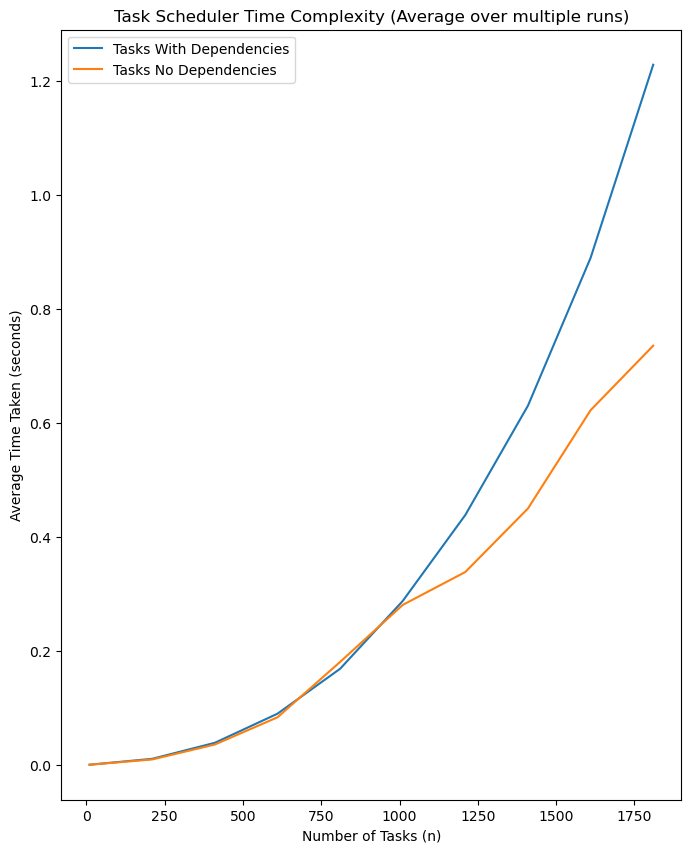

In [135]:
import time
import matplotlib.pyplot as plt

def generate_random_task_with_d(id, max_duration=60):
    """
    Generates a random task with dependencies.

    Each task generated will have a unique ID, a random duration, and a set
    of dependencies which include all tasks with a lower ID.

    Parameters:
    - id (int): The unique identifier for the task.
    - max_duration (int): The maximum duration for the task. Defaults to 60.

    Returns:
    - Task: An instance of Task with generated properties and dependencies.
    """
    description = f"Task {id}"
    duration = random.randint(1, max_duration)
    dependencies = list(range(1, id))
    due_time = 360 + (id * 60)
    fixed = False
    return Task(id, description, duration, dependencies, due_time, fixed)

def generate_random_task_with_no_d(id, max_duration=60):
    """
    Generates a random task without dependencies.

    Each task generated will have a unique ID, a random duration, and no
    dependencies.

    Parameters:
    - id (int): The unique identifier for the task.
    - max_duration (int): The maximum duration for the task. Defaults to 60.

    Returns:
    - Task: An instance of Task with generated properties without dependencies.
    """
    description = f"Task {id}"
    duration = random.randint(1, max_duration)
    dependencies = []
    due_time = 360 + (id * 60)
    fixed = False
    return Task(id, description, duration, dependencies, due_time, fixed)

def measure_time_for_n_tasks_with_d(n, repetitions):
    """
    Measures the average time taken to run the scheduler on a set
    number of tasks with dependencies.

    Parameters:
    - n (int): The number of tasks to generate and schedule.
    - repetitions (int): The number of times the scheduling should
    be repeated to calculate the average time.

    Returns:
    - float: The average time taken to run the scheduler for the 
    specified number of tasks with dependencies.
    """
    times = []
    for _ in range(repetitions):
        tasks = [generate_random_task_with_d(i) for i in range(1, n + 1)]
        scheduler = TaskScheduler(tasks)
        start_time = time.time()
        scheduler.run_silent_task_scheduler(0)
        times.append(time.time() - start_time)
    return sum(times) / len(times)  # return the average time

def measure_time_for_n_tasks_with_no_d(n, repetitions):
    """
    Measures the average time taken to run the scheduler on a set 
    number of tasks without dependencies.

    Parameters:
    - n (int): The number of tasks to generate and schedule.
    - repetitions (int): The number of times the scheduling 
    should be repeated to calculate the average time.

    Returns:
    - float: The average time taken to run the scheduler for the
    specified number of tasks without dependencies.
    """
    times = []
    for _ in range(repetitions):
        tasks = [generate_random_task_with_no_d(i) for i in range(1, n + 1)]
        scheduler = TaskScheduler(tasks)
        start_time = time.time()
        scheduler.run_silent_task_scheduler(0)
        times.append(time.time() - start_time)
    return sum(times) / len(times)  

task_counts = list(range(10, 2010, 200))
avg_times_dependencies = [measure_time_for_n_tasks_with_d(n, 5) for n in task_counts]  
avg_times_no_dependencies = [measure_time_for_n_tasks_with_no_d(n, 5) for n in task_counts]  

plt.plot(task_counts, avg_times_dependencies, label='Tasks With Dependencies')
plt.plot(task_counts, avg_times_no_dependencies, label='Tasks No Dependencies')
plt.xlabel('Number of Tasks (n)')
plt.ylabel('Average Time Taken (seconds)')
plt.title('Task Scheduler Time Complexity (Average over multiple runs)')
plt.legend() 
plt.show()

### AI Statement
I only used AI for modifying code in this assignemnt. Whenever I felt stuck I would ask ChatGPT for clarifications but I did not copy its content.